# 2. Graphical monitoring and overfitting

## Regression example: California Housing

Let us consider next how a regression problem (i.e. predicting the value of a continuously varying numerical target variable) can be analyzed with a neural network model. After some useful imports, we begin by downloading a dataset concerning housing prizes in California; see [this link](https://keras.io/api/datasets/california_housing/) for more details.

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.datasets import california_housing

(inputs, targets), (x_test, y_test) = california_housing.load_data(version='small', test_split=0.2)
print(inputs.shape, x_test.shape)
print(targets.shape, y_test.shape)

(480, 8) (120, 8)
(480,) (120,)


As usual, a part of the labeled data is reserved for testing the trained model afterwards. However, now we divide the remaining 480 data samples further in two separate sets: a training set containing 380 samples, and **a validation set** of 100 samples. Having a validation set (sometimes also called *development set*) serves two useful purposes:

1. **Monitoring during training**: when the model is trained, and the selected metrics recorded after each epoch for both sets, the validation set provides information about the model's performance with data not used for actual training. Not only does this provide more reliable estimate for the performance, but also makes it possible to recognize overfitting, when it happens.

2. **Hyperparameter optimization**: when solving a machine learning problem with neural networks, it is usually necessary to try several models with different architectures and different values for hyperparameters (the number of hidden layers, and the numbers of neurons in each hidden layer). The performance metrics of each different model can be calculated with the validation set, and the best one chosen as the final model; this can then be evaluated using the independent test set to obtain a very reliable performance estimate.  

In [6]:
# Extract sets for training and validation
x_train = inputs[:380]
y_train = targets[:380]
x_val = inputs[380:]
y_val = targets[380:]

Next, we standardize the input features by subtracting the mean and dividing by the standard deviation. Note that only the training set is used to estimate the mean and standard deviation in the dataset; both the validation set and the test set are then also standardized using these values. In addition, we divide the target variable (house prize in dollars) by 100000, in order to obtain values on the order of unity.

In [7]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
x_val -= mean
x_val /= std
y_train /= 1e5
y_test /= 1e5
y_val /= 1e5

After this simple preprocessing, we are ready to construct a neural network model for treating the regression problem for the above data.

In the cell below, a simple model with two fully connected hidden layers with ReLU activation is built. Note that the output layer only contains a single unit for outputting the prediction for the prize, and no activation function is used (the model is able to output any value without restrictions). The appropriate loss function for a regression problem is mean squared error (MSE), and the mean average error (MAE) is chosen as the metric to be monitored.

In [47]:
model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
    ])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

Next, we train the model for 300 epochs, with the validation set extracted above. The zero value for the verbose parameter suppresses the outputs during training. Instead, we use the History object returned by the fit method to access the information about training progress.

In [48]:
history = model.fit(x_train, y_train, epochs=300, batch_size=16, validation_data=(x_val, y_val), verbose=0)

The History object contains a dictionary `history`, whose keys can be used to access arrays containing the recorded metrics after each epoch. Using Matplotlib, we can e.g. take a look at loss values during training both for the training set and validation set as follows (note that first ten epochs are discarded for clearer visualization): 

Text(0, 0.5, 'Loss')

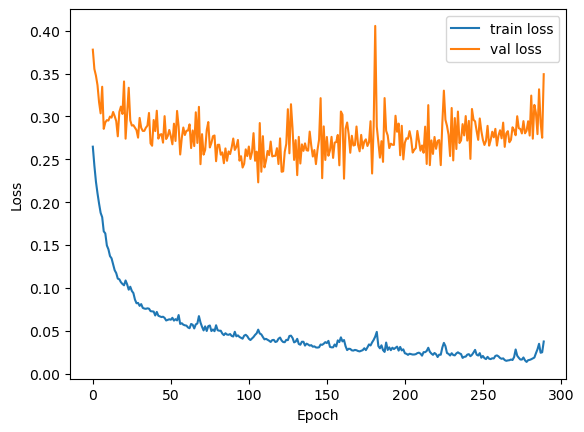

In [49]:
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Mean average error')

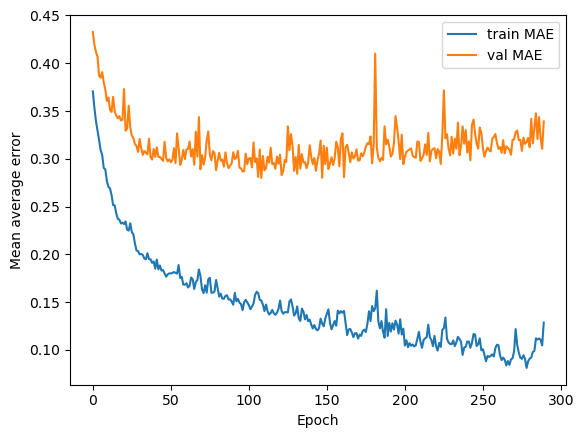

In [52]:
plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean average error')

In [56]:
import numpy as np

x_train_full = np.concatenate((x_train, x_val), axis=0) # join train + val sets
y_train_full = np.concatenate((y_train, y_val), axis=0)

model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
    ])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.fit(x_train_full, y_train_full, epochs=100, batch_size=16, verbose=0)

In [57]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test mean average error: {test_mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3308 - mae: 0.3287
Test mean average error: 0.3071383237838745
